Dataset used link: https://drive.google.com/open?id=1BpB87f9a2t-7zQ7J20HvZu13hqtY_uxC

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import folium
from folium.plugins import MarkerCluster
import json
import seaborn as sns

In [3]:
data_df = pd.read_csv("data/uberlyft.csv").set_index('time_stamp')
data_df.index = pd.to_datetime(data_df.index)
data_df.head()

,day,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,temp,clouds,pressure,rain,humidity,wind,Sports Occurence
time_stamp,,,,,,,,,,,,,,,,,
2018-11-26 05:26:40,Mon,1.51,Uber,Theatre District,Haymarket Square,15.0,1.0,5321c595-ddbe-4f24-b128-cf0ffb2944fb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,40.64,0.93,1013.78,0.0,0.92,3.01,0.0
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,14.0,1.0,74a108a3-8d5f-4445-8f9b-dd8a0f8e5ae5,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,40.64,0.92,1013.76,0.0,0.92,3.02,0.0
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,ad8c44f5-9ace-4e30-aa72-9f44e2e2304b,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.56,0.93,1013.77,0.0,0.93,3.17,0.0
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,a363f700-6009-4e51-953a-38176cf958ec,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,40.56,0.93,1013.77,0.0,0.93,3.17,0.0
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,9.5,1.0,574c4736-7681-48da-be82-7e5ce23537a0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.64,0.92,1013.76,0.0,0.92,3.02,0.0


# What areas in Boston are the locations for ride pickups and dropoffs in the dataset?

In [4]:
print("Pickup locations: ", data_df.source.unique())
print("Dropoff locations: ", data_df.destination.unique())

Pickup locations:  ['Haymarket Square' 'Back Bay' 'South Station' 'Northeastern University'
 'West End' 'North End' 'Beacon Hill' 'Theatre District' 'North Station'
 'Boston University' 'Financial District' 'Fenway']
Dropoff locations:  ['Theatre District' 'North End' 'West End' 'South Station'
 'Haymarket Square' 'Boston University' 'Fenway' 'Back Bay' 'Beacon Hill'
 'Financial District' 'North Station' 'Northeastern University']


In [5]:
BOS_COORDINATES = (42.3601, -71.0589) # Boston's latitude and longitude
  
# create empty map zoomed in on San Francisco
m = folium.Map(location=BOS_COORDINATES, zoom_start=14) # mapping the coordinates

boundaries = r'data/Boston_Neighborhoods.geojson' # contains West End, North End, Back Bay, Beacon Hill, Fenway, 
                                                  # and Downtown area data

folium.GeoJson(boundaries, name='geojson').add_to(m) # create borders around the areas  

# display markers on the seven smaller areas
folium.Marker([42.3398, -71.0892], popup='Northeastern University').add_to(m)
folium.Marker([42.3519, -71.0643], popup='Theatre District').add_to(m)
folium.Marker([42.3559, -71.0550], popup='Financial District').add_to(m)
folium.Marker([42.3622, -71.0570], popup='Haymarket Square').add_to(m)
folium.Marker([42.3519, -71.0551], popup='South Station').add_to(m)
folium.Marker([42.3661, -71.0631], popup='North Station').add_to(m)
folium.Marker([42.3505, -71.1054], popup='Boston University').add_to(m)

display(m)

See boston_folium.png to view image of map.

There are 12 areas covered in the dataset, each a location of pickup and dropoff for Uber and Lyft rides. Five Boston neighborhoods: North End, West End, Back Bay, Beacon Hill, and Fenway are labeled by the blue border as displayed by the map above. Rides were also picked up and dropped off in seven smaller areas, labeled by the blue marker as displayed by the map above, which are located within the previous five large neighborhoods, along with a sixth: Downtown. Within the Fenway area are Boston University and Northeastern University, within West End is North Station, within the Downtown area are Theatre District, Financial District, North Station, and Haymarket Square. 

# What features are highly correlated with the target feature, price, or with any of the other independent features?

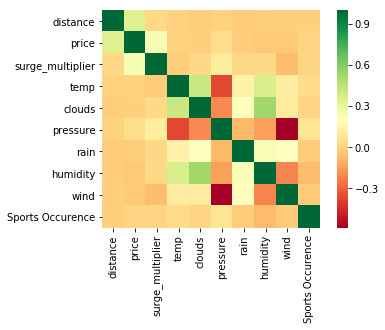

In [6]:
sns.heatmap(data_df.corr(), square=True, cmap='RdYlGn') # heatmap of correlations between features in the dataset

According to the heatmap, distance is somewhat positively correlated with the price of the ride, as well as, surge-multiplier, which is intuitive, as the greater the distance of the ride results in a higher priced ride, and, the lack of supply of rides or rides at a certain time of day, causing a surge-multiplier > 1.0, causes an increase in the price of the ride. A few of the weather features seem to strongly correlate with other weather features, such as the negative correlation with temp and pressure, wind and pressure. A somewhat positive correlation exists with clouds and humidity, temp and clouds, temp and humidity.  

# When comparing similar Uber and Lyft ride types, are the trends between distance and price similar between similar ride-types? 

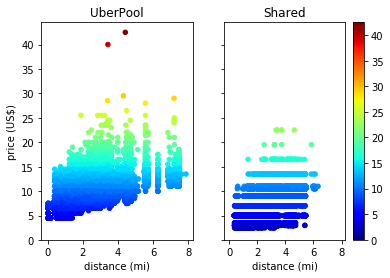

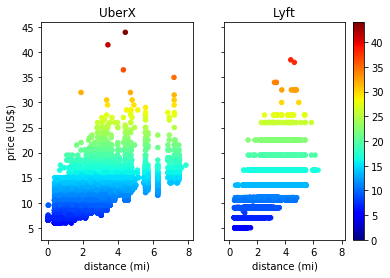

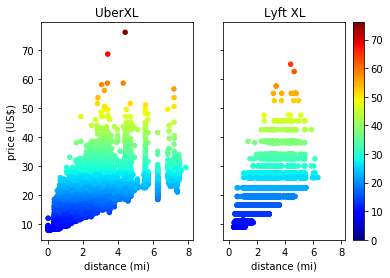

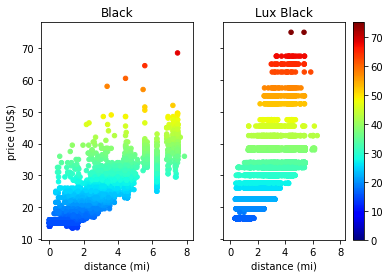

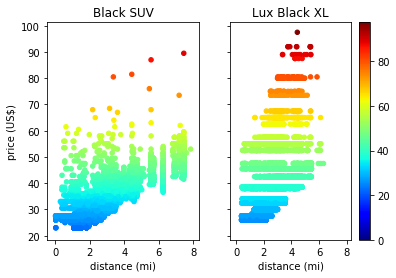

In [7]:
"""
scatter(): Method that takes in two dataframes representing two different ride types, one
for Uber and one for Lyft. Saves the distance and price values into two arrays for 
each ride type, then plots a scatter plot for each type. 

Input: uber: dataframe for uber ride type, lyft: dataframe for lyft ride type, u_title: uber ride type title for subplot, 
l_title: lyft ride type title for subplot
"""
def scatter(uber, lyft, u_title, l_title):
    ub_x = uber['distance'] # distance feature for uber ride
    ub_y = uber['price'] # price feature for uber ride
    ly_x = lyft['distance'] # for lyft ride...
    ly_y = lyft['price'] 
    
    plot, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True) 
    ax1.set_title(u_title)
    ax1.set_xlabel('distance (mi)')
    ax1.set_ylabel('price (US$)')
    
    ax2.set_title(l_title)
    ax2.set_xlabel('distance (mi)')
    ax2.get_shared_x_axes().join(ax1, ax2) # same axis for each subplot
    
    # plot scatter plots of uber and lyft ride type price by distance
    if max(ub_y) >= max(ly_y): # if max price of uber is greater than lyft's max price, assign uber's prices to c 
        points = ax1.scatter(ub_x, ub_y, c=ub_y, vmin=0, vmax=max(max(ub_y), max(ly_y)), s=20, cmap="jet")
        ax2.scatter(ly_x, ly_y, c=ly_y, vmin=0, vmax=max(max(ub_y), max(ly_y)), s=20, cmap="jet")
        
        plot.colorbar(points)
        plt.show()
    else: # assign lyft's prices to c
        points = ax2.scatter(ly_x, ly_y, c=ly_y, vmin=0, vmax=max(max(ub_y), max(ly_y)), s=20, cmap="jet") 
        ax1.scatter(ub_x, ub_y, c=ub_y, vmin=0, vmax=max(max(ub_y), max(ly_y)), s=20, cmap="jet")
        
        plot.colorbar(points)
        plt.show()
        
uber_names = ['UberPool', 'UberX', 'UberXL', 'Black', 'Black SUV']
lyft_names = ['Shared', 'Lyft','Lyft XL', 'Lux Black','Lux Black XL']

x = 0
for x in range(len(uber_names)):
    uber = data_df[data_df['name'] == uber_names[x]] # dataframe for Uber ride type
    lyft = data_df[data_df['name'] == lyft_names[x]] # dataframe for Lyft ride type similar to Uber ride type (except Lux to WAV)
    scatter(uber, lyft, uber_names[x], lyft_names[x]) # plot price by distance as scatterplot



Based on the trends observed between each Uber ridetypes, there seems to be a positive correlation with the distance of the ride and the average price per mile, which may point towards distance being important factor or feature in determining the price for each ride. As for comparing the ride-types, it seems that UberPool, UberX, and Uber XL can generate prices higher than their Lyft counterpart, whereas Lux Black and Lux Black XL can generate prices higher than their Uber counterpart, when comparing similar distances. 

# For riders, when deciding to use Uber or Lyft, which ride type provides the best value based dollars per mile?

In [8]:
"""
Method which labels the bars within a barplot, in which, depending of the grouping of bars, will display the value
of the bar at the top right, top center, of top left, of the bar. Values are rounded to two decimal places.

Inputs: rect: plot bar/bars, xpos: defaults to top center of bar.
Returns plot bar with labeled bar value positioned at the top of the bar.
"""
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
    return rect

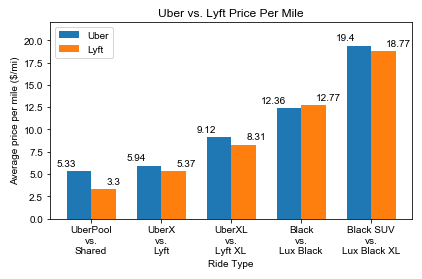

In [9]:
ub_avg = []
ly_avg = []

x = 0
for x in range(len(uber_names)):
    if uber_names[x] == 'WAV': # WAV and Lux are not similar ride types
        x += 1
    else:   
        uber = data_df[data_df['name'] == uber_names[x]] # dataframe for uber ride type
        lyft = data_df[data_df['name'] == lyft_names[x]] # dataframe for lyft ride type 
        
        ub_x = uber['distance'] 
        ub_y = uber['price']
        ub_avg.append(np.average(ub_y/ub_x)) # determine average price per 1 mile
        
        ly_x = lyft['distance']
        ly_y = lyft['price']
        ly_avg.append(np.average(ly_y/ly_x))

ind = np.arange(len(ub_avg))
width = 0.35  # the width of the bars

# plot barplots to compare the average price per mile for similar ride types between Uber and Lyft
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, ub_avg, width, label='Uber') # Uber barplots
rects2 = ax.bar(ind + width/2, ly_avg, width, label='Lyft') # lyft barplots

ax.set_xlabel('Ride Type')
ax.set_ylabel('Average price per mile ($/mi)')
ax.set_ylim(0, 22)
ax.set_title('Uber vs. Lyft Price Per Mile')
ax.set_xticks(ind)
ax.set_xticklabels(('UberPool\nvs.\nShared', 'UberX\nvs.\nLyft', 'UberXL\nvs.\nLyft XL', 'Black\nvs.\nLux Black', 'Black SUV\nvs.\nLux Black XL'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
sns.set_style('darkgrid')
plt.show()

Based on the average price per one mile of each ridetype in Boston from Uber and Lyft, if the rider would like to share their ride, with other riders, to their destination, splitting the cost, the shared ride type by Lyft would be preferable. If the rider requested their own car for transportation, for up to 3 riders, Lyft is preferable over UberX slightly, and Black or Lux Black are equally good options. For transportation of more than 4 riders, Lyft XL or Lux Black XL is preferable over their Uber counterparts as their is a slight difference in price per mile, which can add up if the destination is many miles farther than the pickup.

# What is the average price per mile during normal hours, rush-hours, and late-early hours for Uber and Lyft rides?

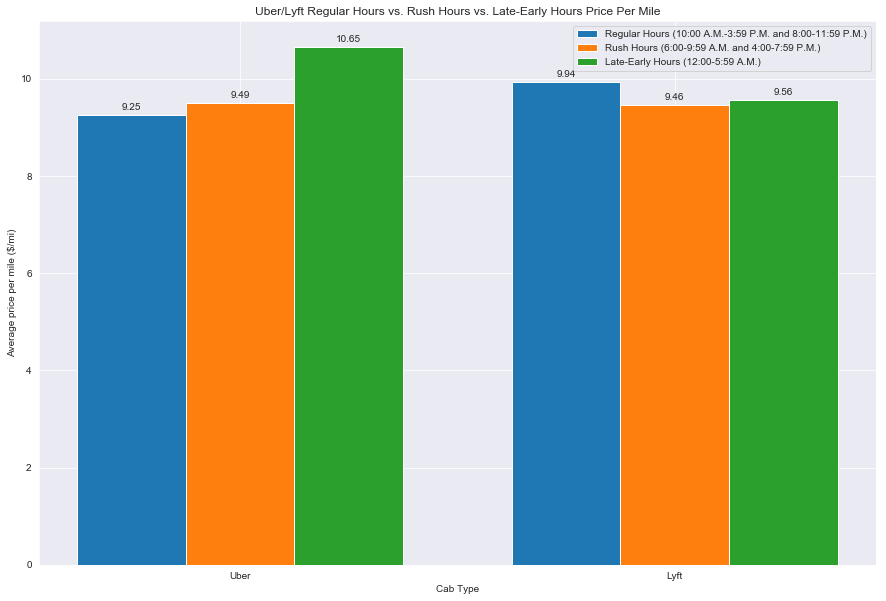

In [10]:
rh_avg = []
non_avg = []
le_avg = []
cabs = ['Uber', 'Lyft']

for cab in cabs:
    ride = data_df[data_df.cab_type == cab]
    # filter rides, in which pickup times are between 6:00 to 9:00 A.M, and 4:00 to 7:00 P.M.
    rh_ride = ride[((ride.index.hour >= 16) & (ride.index.hour <= 19)) | ((ride.index.hour >= 6) & (ride.index.hour <= 9))]
    # filter rides, in which pickup times are between 9:01 A.M to 3:59 P.M., and 7:01 to 11:00 P.M.
    non_ride = ride[((ride.index.hour > 9) & (ride.index.hour < 16)) | ((ride.index.hour > 19) & (ride.index.hour <= 23))]
    # filter rides, in which pickup times are between 12:00 A.M to 5:59 A.M.
    le_ride =  ride[((ride.index.hour >= 0) & (ride.index.hour < 6))]

    rh_x = rh_ride['distance'] 
    rh_y = rh_ride['price']

    non_x = non_ride['distance'] 
    non_y = non_ride['price']

    le_x = le_ride['distance'] 
    le_y = le_ride['price']

    rh_avg.append(np.average(rh_y/rh_x)) # determine average price per 1 mile during rush-hour
    non_avg.append(np.average(non_y/non_x)) # determine average price per 1 mile during regular hours
    le_avg.append(np.average(le_y/le_x)) # determine average price per 1 mile during late-early hours

ind = np.arange(len(rh_avg))
width = 0.25 # the width of the bars

# create barplot for average price per mile for rides under the three time ranges for both Uber and Lyft rides. 
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(ind - width, non_avg, width, label='Regular Hours (10:00 A.M.-3:59 P.M. and 8:00-11:59 P.M.)')
rects2 = ax.bar(ind, rh_avg, width, label='Rush Hours (6:00-9:59 A.M. and 4:00-7:59 P.M.)')
rects3 = ax.bar(ind + width, le_avg, width, label='Late-Early Hours (12:00-5:59 A.M.)')

ax.set_xlabel('Cab Type')
ax.set_ylabel('Average price per mile ($/mi)')
ax.set_title('Uber/Lyft Regular Hours vs. Rush Hours vs. Late-Early Hours Price Per Mile')
ax.set_xticks(ind)
ax.set_xticklabels(['Uber', 'Lyft'])
ax.legend()

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
sns.set_style('darkgrid')
plt.show()

Based on the visual, Uber rides during late to early hours generally cost more than rides at both rush hour and regular hours, based on the 1 to 1.50 dollar price increase during these times, and, Uber rides during rush hour times cost only slightly more than regular hours. However, this is not the case for Lyft rides, in which rides at regular hours seem to cost slightly more than both rides at rush hours and late to early hours. 

# Are there specific days in the week that are more predisposed to surge-multiplied rides greater than a multiplier of 1?

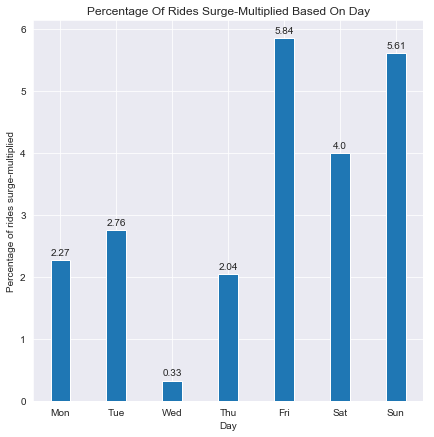

In [11]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig, ax = plt.subplots(figsize=(7,7))
perc_list = []
x = 0
for day in days:
    ride_hour = data_df[(data_df.day == day)]
    tot = len(ride_hour) # total number of rides on specific day
    mult = ride_hour[ride_hour.surge_multiplier > 1.0] 
    tot_surge = len(mult) # total number of rides surge multiplied greater that 1 on specific day
    
    if tot_surge == 0: # if no rides surged > 1
        perc = 0
    else:
        perc = tot_surge/tot * 100 # percentage of rides surged > 1 on specific day
        perc_list.append(perc)

ind = np.arange(len(perc_list))
width = 0.35  # the width of the bars

# create barplot for % of rides surge-multiplied > 1 by each day
rect1 = ax.bar(np.arange(0,7,1), perc_list, width)

ax.set_xlabel('Day')
ax.set_ylabel('Percentage of rides surge-multiplied')
ax.set_title("Percentage Of Rides Surge-Multiplied Based On Day")
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_xticks(ind)

autolabel(rect1)
sns.set_style('darkgrid')
plt.show()

It seems that during the first four weekdays (Mon-Thur), a small percentage of rides are surge multiplied greater than 1, as Wednesday shows a particularly small percentage of rides that are surge-multiplied. Friday, Saturday and Sunday almost doubles the percentage of rides that are surge multiplied, compared to weekdays, indicating that these days are prone to higher than normal pricing of rides from either Uber or Lyft. 

# Are certain times of the day more predisposed to surge-multiplied rides greater than a multiplier of 1.0?

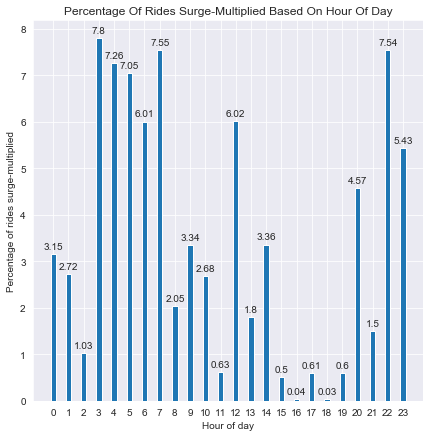

In [12]:
data_df['hour'] = data_df.index.hour # creates new column to represent the hour of pickup

fig, ax = plt.subplots(figsize=(7,7))
perc_list = []
x = 0
for x in range(24): # for each hour
    ride_hour = data_df[(data_df.hour == x)]
    tot = len(ride_hour) # total number of rides at specific hour
    mult = ride_hour[ride_hour.surge_multiplier > 1.0]
    tot_surge = len(mult) # total number of rides surged > 1.0 at specific hour
    
    if tot_surge == 0: # if no rides surge multiplied > 1.0 at specific hour
        perc = 0
    else:
        perc = tot_surge/tot * 100 # percentage of rides surged > 1.0 at specific hour
        perc_list.append(perc)

ind = np.arange(len(perc_list))
width = 0.35  # the width of the bars

# create barplot for % of rides surge-multiplied > 1 by each hour
rect1 = ax.bar(np.arange(0,24,1), perc_list, width)

ax.set_xlabel('Hour of day')
ax.set_ylabel('Percentage of rides surge-multiplied')
ax.set_title("Percentage Of Rides Surge-Multiplied Based On Hour Of Day")
ax.set_xticks(ind)

sns.set_style('darkgrid')
autolabel(rect1)
plt.show()

The hours that are more prone to higher than normal pricing, by being surge-multiplied greater than 1.0, are between 3:00 to 7:00 A.M., as well as, 12:00 P.M, 8:00 P.M, and 11:00 to 12:00 P.M. With the exception of rides at 12:00 and 8:00 P.M, the majority of rides that are surge-multiplied, greater than 1.0, have occurred at late to early hours. Most rides occuring during normal hours and rush-hours seem to not be as surge-multiplied to the extent to these late to early hours. 

# Does the presence of a sports game affect the price or surge-multiplier of the ride? 

C:\Users\dgoka\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


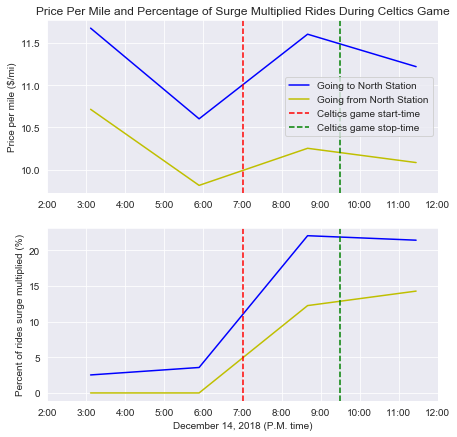

In [13]:
# rides filtered by 4 specific times that occur during the Celtics game occuring on December 14, 2018
ride_sport = data_df[((data_df.index == '2018-12-14 15:06:40')|(data_df.index == '2018-12-14 17:53:20')|(data_df.index == '2018-12-14 20:40:00')|(data_df.index =='2018-12-14 23:26:40'))]

# rides further filtered for pickup and dropoff at North Station, which is closest to TD Garden (Celtics arena)
to_ns = ride_sport[ride_sport.destination == 'North Station'] # dropoff at North Station
from_ns = ride_sport[ride_sport.source == 'North Station'] # pickup at North Station

times = ['2018-12-14 15:06:40', '2018-12-14 17:53:20','2018-12-14 20:40:00', '2018-12-14 23:26:40']

to_avgs = []
from_avgs = []
datetimes = []
to_perc_list = []
from_perc_list = []
for time in times:
    datetimes.append(pd.to_datetime(time))
    
    to_data = to_ns[to_ns.index == time]
    to_price = to_data['price'] 
    to_dist = to_data['distance'] 
    
    to_avgs.append(np.average(to_price/to_dist)) # determine average price per 1 mile going towards North Station
    
    mult = to_data[to_data.surge_multiplier > 1.0]
    tot_surge = len(mult) # total number of rides surge multiplied > 1 at specific time
    tot = len(to_data) # total number of rides at specific time
    if tot_surge == 0: # if no rides surge multiplied > 1 at specific time
        perc = 0
    else:
        perc = tot_surge/tot * 100 # percentage of rides surge multiplied > 1 at specific time
    to_perc_list.append(perc)        
    
    from_data = from_ns[from_ns.index == time]
    from_price = from_data['price']
    from_dist = from_data['distance']
    
    from_avgs.append(np.average(from_price/from_dist)) # determine average price per 1 mile coming from North Station
    
    mult = from_data[from_data.surge_multiplier > 1.0]
    tot_surge = len(mult)    
    tot = len(from_data)    
    if tot_surge == 0:
        perc = 0
    else:
        perc = tot_surge/tot * 100        
    from_perc_list.append(perc)

# create line plot to display average price per mile during Celtics game
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=[7,7])

ax1.plot_date(datetimes, to_avgs,'b-', label='Going to North Station')
ax1.plot_date(datetimes, from_avgs,'b-', color = 'y', label='Going from North Station')

# plotted Celtics game start and stop time
ax1.axvline(datetime.datetime(2018,12,14,19,0,0), color='r', linestyle='--', label = 'Celtics game start-time')
ax1.axvline(datetime.datetime(2018,12,14,21,30,0), color='g', linestyle='--', label = 'Celtics game stop-time') 

# set x-axis from 2:00 P.M. to 12:00 A.M. on December 14, 2018 
ax1.set_xlim([datetime.datetime(2018, 12, 14, 14, 0, 0), datetime.datetime(2018, 12, 15, 0, 0, 0)])
ax1.set_xticklabels(['2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00'])

ax1.set_ylabel("Price per mile ($/mi)")
ax1.legend()

# create line plot to display % of rides surged > 1 for rides during Celtics game
ax2.plot_date(datetimes, to_perc_list,'b-', label='Going to North Station')
ax2.plot_date(datetimes, from_perc_list,'b-', color = 'y', label='Going from North Station')

ax2.axvline(datetime.datetime(2018,12,14,19,0,0), color='r', linestyle='--', label = 'Celtics game start-time')
ax2.axvline(datetime.datetime(2018,12,14,21,30,0), color='g', linestyle='--', label = 'Celtics game stop-time')

ax2.set_xlim([datetime.datetime(2018, 12, 14, 14, 0, 0), datetime.datetime(2018, 12, 15, 0, 0, 0)])
ax2.set_xticklabels(['2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00'])

ax2.set_xlabel("December 14, 2018 (P.M. time)")
ax2.set_ylabel("Percent of rides surge multiplied (%)")

ax1.set_title("Price Per Mile and Percentage of Surge Multiplied Rides During Celtics Game")

sns.set_style('darkgrid')
plt.show()

For the Celtics game occuring on December 14, 2018, the price per mile seemed to increase slightly more for rides going towards and coming from North Station (in which the TD Garden arena is slightly north of) once the game started at 7:00 P.M. The percentage of rides that are surge-multiplied greater 1.0 have significantly increased once the game began, which may indicate a greater demand for rides going toward and coming from the area. 

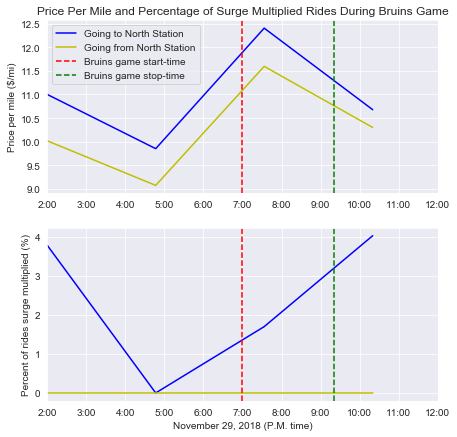

In [14]:
# rides filtered by 4 specific times that occur during the Bruins game occuring on November 29, 2018
ride_sport = data_df[((data_df.index =='2018-11-29 14:00:00')|(data_df.index == '2018-11-29 16:46:40')|(data_df.index == '2018-11-29 19:33:20')|(data_df.index == '2018-11-29 22:20:00'))]

# rides further filtered for pickup and dropoff at North Station, which is closest to TD Garden (Bruins arena)
to_ns = ride_sport[ride_sport.destination == 'North Station'] # dropoff at North Station
from_ns = ride_sport[ride_sport.source == 'North Station'] # pickup at North Station

times = ['2018-11-29 14:00:00','2018-11-29 16:46:40','2018-11-29 19:33:20','2018-11-29 22:20:00']

to_avgs = []
from_avgs = []
datetimes = []
to_perc_list = []
from_perc_list = []

for time in times:
    datetimes.append(pd.to_datetime(time))
    to_data = to_ns[to_ns.index == time]
    to_price = to_data['price']
    to_dist = to_data['distance']
    
    to_avgs.append(np.average(to_price/to_dist)) # determine average price per 1 mile going towards North Station
    
    mult = to_data[to_data.surge_multiplier > 1.0]
    tot_surge = len(mult) # total number of rides surge multiplied > 1 at specific time
    tot = len(to_data) # total number of rides at specific time
    if tot_surge == 0: # if no rides surge multiplied > 1 at specific time
        perc = 0
    else:
        perc = tot_surge/tot * 100 # percentage of rides surge multiplied > 1 at specific time
    to_perc_list.append(perc)        
    
    from_data = from_ns[from_ns.index == time]
    from_price = from_data['price']
    from_dist = from_data['distance']
    
    from_avgs.append(np.average(from_price/from_dist)) # determine average price per 1 mile coming from North Station
    
    mult = from_data[from_data.surge_multiplier > 1.0]
    tot_surge = len(mult)    
    tot = len(from_data)    
    if tot_surge == 0:
        perc = 0
    else:
        perc = tot_surge/tot * 100        
    from_perc_list.append(perc)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=[7,7])

# create line plot to display average price per mile during Bruins game
ax1.plot_date(datetimes, to_avgs,'b-', label='Going to North Station')
ax1.plot_date(datetimes, from_avgs,'b-', color = 'y', label='Going from North Station')

# plotted Bruins game start and stop time
ax1.axvline(datetime.datetime(2018,11,29,19,0,0), color='r', linestyle='--', label = 'Bruins game start-time')
ax1.axvline(datetime.datetime(2018,11,29,21,20,0), color='g', linestyle='--', label = 'Bruins game stop-time')

# set x-axis from 2:00 P.M. to 12:00 A.M. on November 29, 2018
ax1.set_xlim([datetime.datetime(2018, 11, 29, 14, 0, 0), datetime.datetime(2018, 11, 30, 0, 0, 0)])
ax1.set_xticklabels(['2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00'])

ax1.set_ylabel("Price per mile ($/mi)")
ax1.legend()

# create line plot to display % of rides surged > 1 for rides during Bruins game
ax2.plot_date(datetimes, to_perc_list,'b-', label='Going to North Station')
ax2.plot_date(datetimes, from_perc_list,'b-', color = 'y', label='Going from North Station')

ax2.axvline(datetime.datetime(2018,11,29,19,0,0), color='r', linestyle='--', label = 'Bruins game start-time')
ax2.axvline(datetime.datetime(2018,11,29,21,20,0), color='g', linestyle='--', label = 'Bruins game stop-time')

ax2.set_xlim([datetime.datetime(2018, 11, 29, 14, 0, 0), datetime.datetime(2018, 11, 30, 0, 0, 0)])
ax2.set_xticklabels(['2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00'])

ax2.set_xlabel("November 29, 2018 (P.M. time)")
ax2.set_ylabel("Percent of rides surge multiplied (%)")

ax1.set_title("Price Per Mile and Percentage of Surge Multiplied Rides During Bruins Game")

plt.show()

For the Boston Bruins game occuring on November 29, 2018, the price per mile seemed to increase slightly more for rides going towards and coming from North Station (in which the TD Garden arena is slightly north of) once the game started at 7:00 P.M. As opposed to the Celtics game, the percentage of rides that are surge-multiplied greater 1.0 have significantly increased once the game began for rides going towards the game, but none for rides coming from the area. 

# Are prices affected for rides under differing weather conditions?

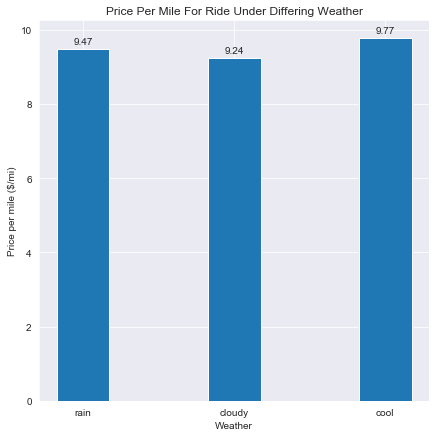

In [15]:
# prepare conditions for new feature column, 'weather_class', with four possible values: heavy rain, rain, cloudy, cool
conditions = [(data_df.rain >= 0.3), (data_df.rain < 0.3) & (data_df.rain > 0), (data_df.clouds == 1) & (data_df.rain == 0)]
choices = ['heavy rain','rain','cloudy'] 

data_df['weather_class'] = np.select(conditions, choices, default = 'cool') # there were no cases for heavy rain

weat = ['rain', 'cloudy', 'cool']

ride_avgs = []
for weather in weat:
    data = data_df[data_df.weather_class == weather] # filter rides by each weather value

    price = data['price']
    dist = data['distance']
    ride_avgs.append(np.average(price/dist)) # compute average price per 1 mile

ind = np.arange(len(ride_avgs))
width = 0.35  # the width of the bars

# plot bar graph for average price per mile of rides under each weather class 
fig, ax = plt.subplots(figsize=(7,7))

rect1 = ax.bar(ind, ride_avgs, width)

ax.set_xlabel('Weather')
ax.set_ylabel('Price per mile ($/mi)')
ax.set_title("Price Per Mile For Ride Under Differing Weather")
ax.set_xticks(ind)
ax.set_xticklabels(x for x in weat)
sns.set_style('darkgrid')
autolabel(rect1)
plt.show()

According to prices per mile under rainy, cloudy, or cool weather, there is only a slight increase in price for rides under cool weather (0.30 cents increase) over rainy weather, which is only slightly more pricier (0.25 cents increase) than cloudy weather. Clearly there isn't a significant effect by weather to the pricing of the Uber or Lyft rides.